In [5]:
import pandas as pd
from plot_utils import *

oed_file = pd.read_csv('../results/Boxing Gym Results - OED.csv')







In [6]:
# get column names
column_names = oed_file.columns.tolist()

print(column_names)

['Environment', 'Mean Error @ 0', 'StdDev @ 0', 'Mean Error @ 10', 'StdDev @ 10', 'Condition', 'Model', 'Notes']


['Death Process', 'Dugongs', 'Hyperbolic Temporal Discount', 'IRT', 'Location Finding', 'Lotka Volterra', 'Peregrines', 'Survival']
[np.float64(-0.8486575706), np.float64(-0.080502923602), np.float64(0.93179814744), np.float64(-0.08), np.float64(3.1240677062), np.float64(-0.20332577893999998), np.float64(-0.28323386453800004), np.float64(0.39023155598)]
[np.float64(0.32179808334628485), np.float64(0.005695172837891562), np.float64(0.10762428856660694), np.float64(0.1136123936901252), np.float64(3.6072483253995986), np.float64(0.18269433289542117), np.float64(0.21169443180591277), np.float64(0.04554285022849923)]
[Environment
Death Process   -0.525000
Death Process   -0.822605
Name: mean, dtype: float64, Environment
Dugongs   -0.077250
Dugongs   -0.076726
Name: mean, dtype: float64, Environment
Hyperbolic Temporal Discount    1.000000
Hyperbolic Temporal Discount    0.843733
Name: mean, dtype: float64, Environment
IRT    0.040000
IRT    0.053333
Name: mean, dtype: float64, Environment
L

/var/folders/r8/pf8rjjjx6s9ctrnx825d113h0000gn/T/ipykernel_11685/2381548748.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  agg_data['ci95'].fillna(0, inplace=True)


ConversionError: Failed to convert value(s) to axis units: ['Death Process', 'Dugongs', 'Hyperbolic Temporal Discount', 'IRT', 'Location Finding', 'Lotka Volterra', 'Peregrines', 'Survival']

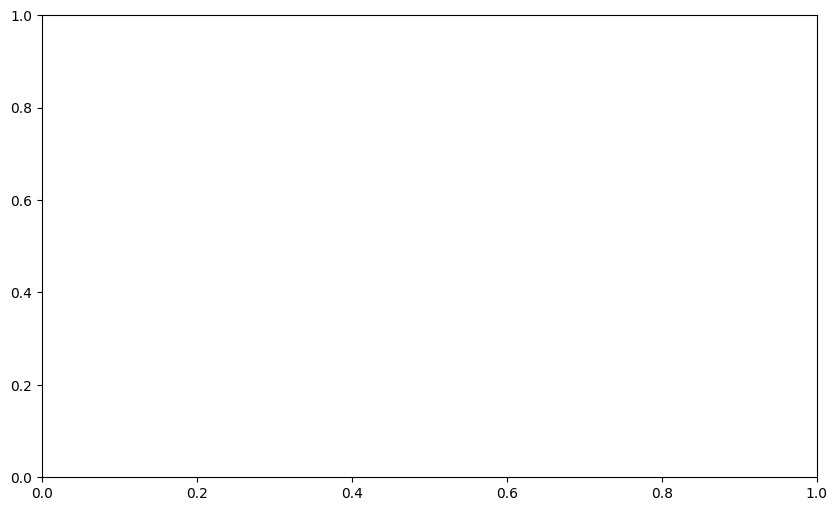

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt # Import needed for potential adjustments if plot_bar is insufficient

# Select relevant data and clean
# Assuming oed_file is loaded from the previous cell
df = oed_file[['Environment', 'Condition', 'Model', 'Mean Error @ 10']].copy()
# Convert 'Mean Error @ 10' to numeric, coercing errors (like 'N/A') to NaN
df['Mean Error @ 10'] = pd.to_numeric(df['Mean Error @ 10'], errors='coerce')
# Drop rows where conversion failed or data was missing
df.dropna(subset=['Mean Error @ 10'], inplace=True)

# Aggregate data: calculate mean and CI (using Standard Error of the Mean) across models for each environment/condition pair
agg_data = df.groupby(['Environment', 'Condition'])['Mean Error @ 10'].agg(['mean', 'std', 'count']).reset_index()

# Calculate 95% CI = 1.96 * SEM
# Avoid division by zero if count is 1 (std will be NaN or 0)
agg_data['sem'] = agg_data['std'] / np.sqrt(agg_data['count'])
agg_data['ci95'] = 1.96 * agg_data['sem']
# Fill CI with 0 where count was 1 (SEM is NaN) or std was 0
agg_data['ci95'].fillna(0, inplace=True)

# Separate data for Prior and No Prior conditions
prior_data = agg_data[agg_data['Condition'] == 'Prior'].set_index('Environment')
# Use contains with case=False to catch variations like 'No prior' or 'No Prior'
no_prior_data = agg_data[agg_data['Condition'].str.contains('No', case=False, na=False)].set_index('Environment')

# Find environments present in both conditions for a paired comparison
common_envs = sorted(list(set(prior_data.index) & set(no_prior_data.index)))

# Prepare lists for plotting, ensuring data corresponds to common_envs
means_prior = [prior_data.loc[env, 'mean'] for env in common_envs]
ci_prior = [prior_data.loc[env, 'ci95'] for env in common_envs]
means_no_prior = [no_prior_data.loc[env, 'mean'] for env in common_envs]
ci_no_prior = [no_prior_data.loc[env, 'ci95'] for env in common_envs]
x_labels = common_envs # Use environment names for x-axis labels

# Define plot parameters
xlabel = "Environment"
ylabel = "Mean Error @ 10 (Avg. across Models)"
title = "Environment Difficulty Comparison (Mean Error @ 10)"
label1 = "Prior"
label2 = "No Prior"
save_path = '../plots/environment_difficulty_comparison.png'
ylims = None # Let plot_bar autoscale y-axis, or specify e.g., (-1, 10)

print(x_labels)
print(means_prior)
print(ci_prior)
print(means_no_prior)
print(ci_no_prior)
# Ensure the plots directory exists
plot_bar(x_labels, means_prior, ci_prior, label1, means_no_prior, ci_no_prior, label2, xlabel, ylabel, title, save_path, ylims)
